<a href="https://colab.research.google.com/github/inuwamobarak/the-Ford-project/blob/main/the_ford_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Import Libraries

In [ ]:
# common
import os
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# pre-processing

## encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## scaling
from sklearn.preprocessing import StandardScaler

## splitting the data
from sklearn.model_selection import train_test_split

## model
from sklearn.ensemble import RandomForestRegressor

## evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# fine tuning
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')

# 1.Import The Data

In [ ]:
# import data
data_dir = "/content/ford.csv"
df = pd.read_csv(data_dir)

In [ ]:
# view the data frame
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


# 2. Data Pre-Processing

In [ ]:
# shape of the data frame
df.shape

(17966, 9)

In [ ]:
# more info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
# check for null values
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# value count of car model
df['model'].value_counts()

 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: model, dtype: int64

In [ ]:
# value count on production year
df['year'].value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: year, dtype: int64

In [ ]:
# value count on transmission type
df['transmission'].value_counts()

Manual       15518
Automatic     1361
Semi-Auto     1087
Name: transmission, dtype: int64

In [ ]:
# value count on fuel type 
df['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [ ]:
# value count on engine size
df['engineSize'].value_counts()

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

# 3.Data Visualization

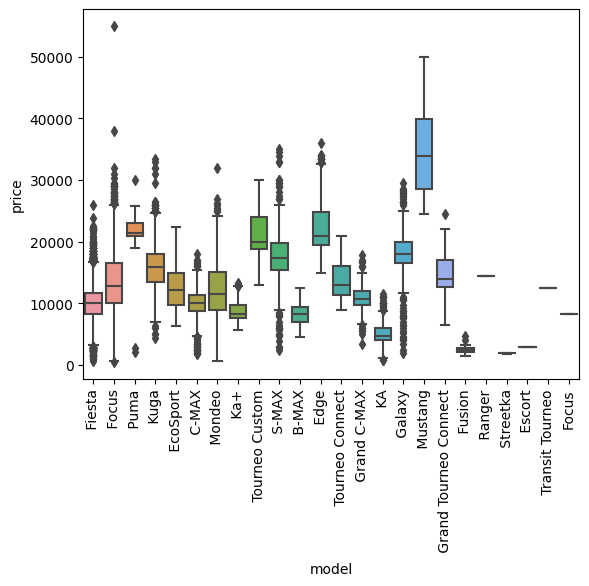

In [ ]:
# car price value based on model
ax = sns.boxplot(data=df, x=df['model'], y=df['price'])
ax.tick_params(axis='x', rotation=90)

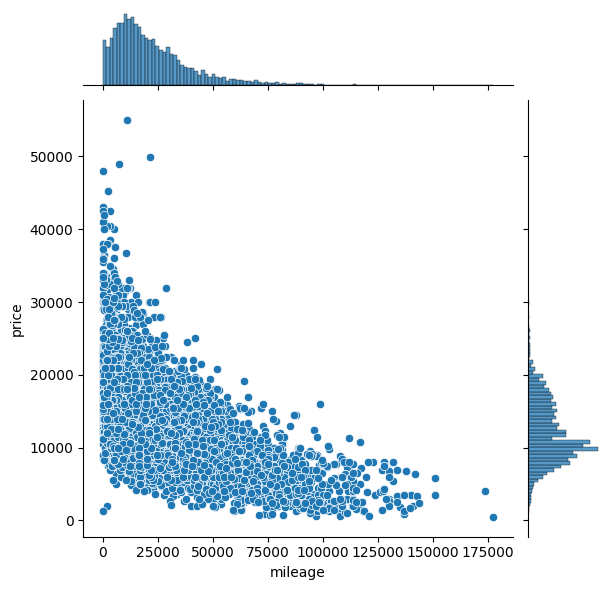

In [ ]:
# car price value based on mileage driven
sns.jointplot(data=df, x=df['mileage'], y=df['price'])

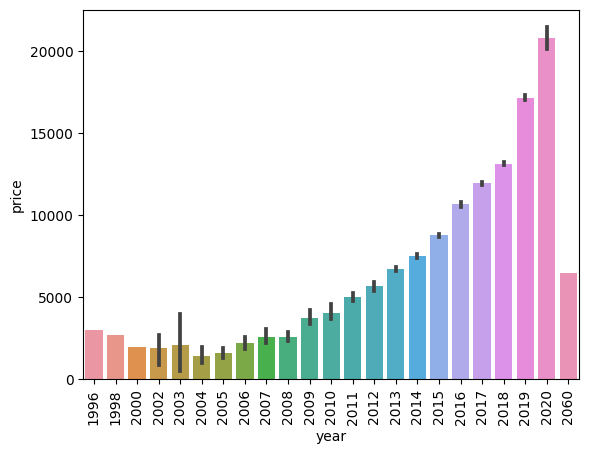

In [ ]:
# car price value based on manufacured year
ax = sns.barplot(data=df, x=df['year'], y=df['price'])
ax.tick_params(axis='x', rotation=90)

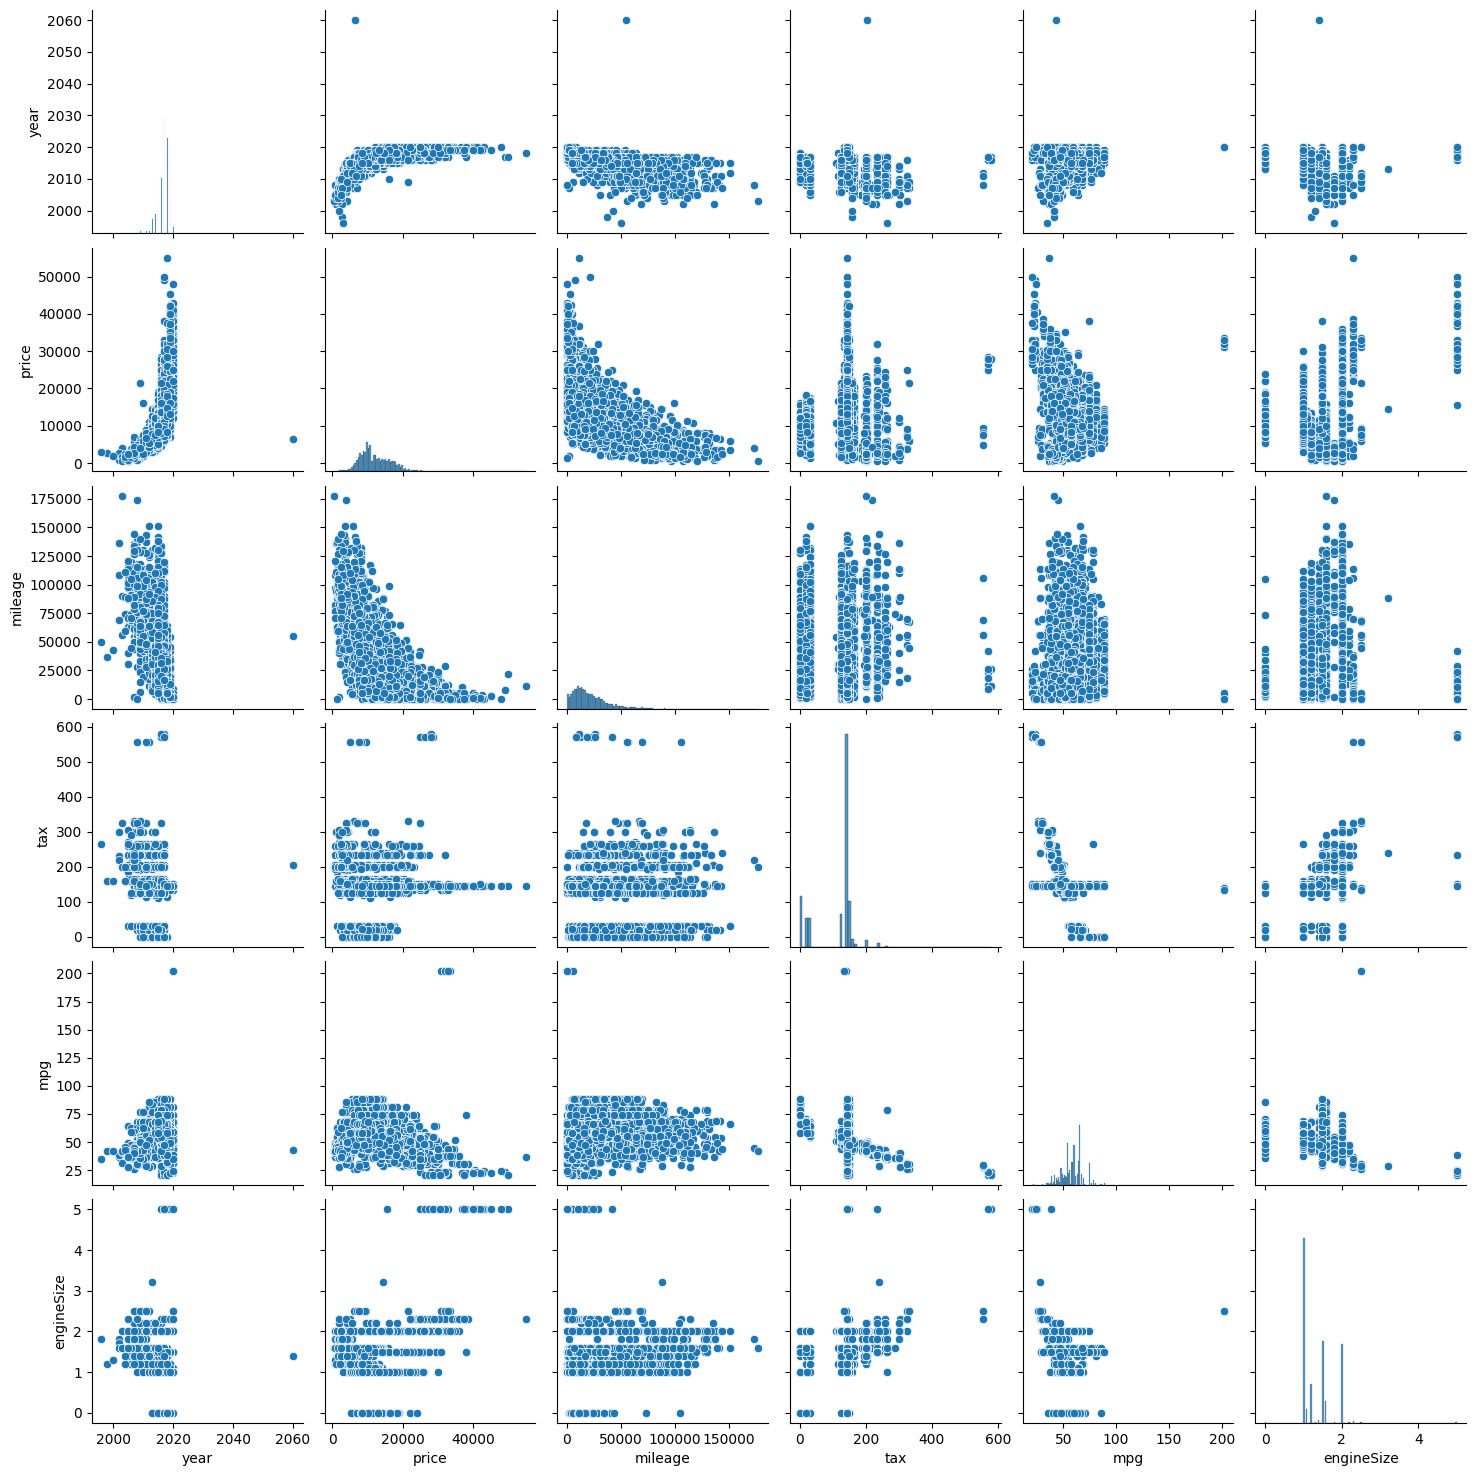

In [ ]:
# pairplot 
sns.pairplot(df)

# Encoding The DataFrame

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
# encoding the car model with label encoder
df['model'] = labelencoder.fit_transform(df['model'])

# encoding the transmission with label encoder
df['transmission'] = labelencoder.fit_transform(df['transmission'])

# encoding the fuel type with label encoder
df['fuelType'] = labelencoder.fit_transform(df['fuelType'])

In [ ]:
# view the encoded data frame
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0


# 5.Splitting the data

In [ ]:
# splitting into feature and label
x = df.drop('price', axis=1)
y = df['price']

In [ ]:
x.head(), x.shape

(   model  year  transmission  mileage  fuelType  tax   mpg  engineSize
 0      5  2017             0    15944         4  150  57.7         1.0
 1      6  2018             1     9083         4  150  57.7         1.0
 2      6  2017             1    12456         4  150  57.7         1.0
 3      5  2019             1    10460         4  145  40.3         1.5
 4      5  2019             0     1482         4  145  48.7         1.0,
 (17966, 8))

In [ ]:
y.head(), y.shape

(0    12000
 1    14000
 2    13000
 3    17500
 4    16500
 Name: price, dtype: int64,
 (17966,))

In [ ]:
# splitting into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14372, 8), (3594, 8), (14372,), (3594,))

In [ ]:
# scaling 
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

# 6.Training the model

In [ ]:
# train
regr = RandomForestRegressor(n_estimators=1000, max_depth=20, random_state=42)
regr.fit(x_train, y_train.values.ravel())

RandomForestRegressor(max_depth=20, n_estimators=1000, random_state=42)

In [ ]:
# make prediction
predictions = regr.predict(x_test)

In [ ]:
result = x_test
result['price'] = y_test
result['prediction'] = predictions.tolist()
result.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price,prediction
17610,5,2014,1,21793,4,0,65.7,1.0,6995,8045.992972
7076,5,2017,1,29020,4,150,65.7,1.0,8999,9000.140095
1713,6,2015,1,46155,0,20,67.3,1.6,7998,8005.422131
1611,0,2013,1,43036,4,30,55.4,1.0,5491,6019.281637
16830,14,2009,1,79000,0,200,48.7,1.8,3790,3247.950000


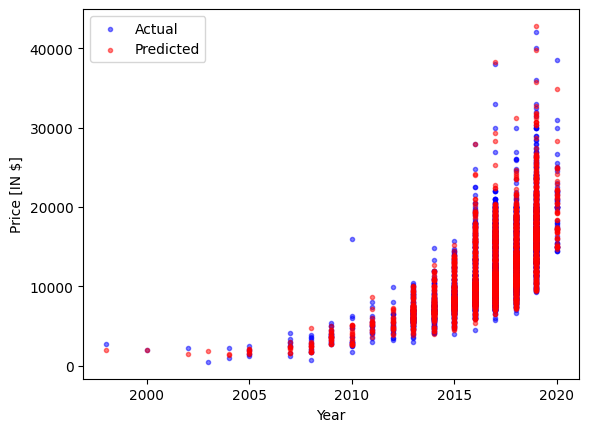

In [ ]:
# view the actual vs prediced price
plt.scatter(x_test.year, y_test, c='b', alpha=0.5, marker='.', label="Actual")
plt.scatter(x_test.year, predictions,c='r', alpha=0.5, marker='.', label="Predicted")
plt.xlabel("Year")
plt.ylabel("Price [IN $]")
plt.legend(loc='upper left')
plt.show()

# 7.Model Evaluation

In [ ]:
# mse
mse = mean_squared_error(y_test.values.ravel(), predictions)

In [ ]:
# mae
mae = mean_absolute_error(y_test.values.ravel(), predictions)

In [ ]:
# r2
r2 = r2_score(y_test.values.ravel(), predictions)

In [ ]:
# results
print(f"MSE: {round(mse, 2)}")
print(f"MAE: {round(mae, 2)}")
print(f"R2 Score: {round(r2, 2)}")

MSE: 1543204.62
MAE: 848.96
R2 Score: 0.93


# 8.Fine Tune Model

In [ ]:
parameters = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 100],
    'n_estimators': [100, 150, 200, 300, 500, 1000]
}

In [ ]:
gridforest = GridSearchCV(regr, parameters, cv=3, n_jobs=-1)
gridforest.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=20, n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 100],
                         'n_estimators': [100, 150, 200, 300, 500, 1000]})

In [ ]:
gridforest.best_params_

{'max_depth': 20, 'n_estimators': 1000}